In [195]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [196]:
raw = pd.read_csv('data/ecommerce.csv', encoding="cp1252")
df = raw.copy()
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [197]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [198]:
# Create a 'Revenue' variable 
df['TotalRevenue'] = df['Quantity']*df['UnitPrice']

In [199]:
# Set the index as a DatetimeIndex
# this allows for time-wise group by operations
df = df.set_index(pd.DatetimeIndex(data=df['InvoiceDate'].dt.date))

In [200]:
# For this dataset, I'll assume that anyone who made his/her first purchase
# in this time window is a new customer
new_customer = df.groupby('CustomerID')['InvoiceDate'].min().reset_index()
new_customer.columns = ['CustomerID', 'FirstPurchaseDate']
new_customer.head()

,CustomerID,FirstPurchaseDate
0,12346.0,2011-01-18 10:01:00
1,12347.0,2010-12-07 14:57:00
2,12348.0,2010-12-16 19:09:00
3,12349.0,2011-11-21 09:51:00
4,12350.0,2011-02-02 16:01:00


In [202]:
df = pd.merge(new_customer, df, on='CustomerID',how='left')
# df.drop(['FirstPurchaseDate_x','FirstPurchaseDate_y'], axis=1, inplace=True)
df = df.set_index(pd.DatetimeIndex(data=df['InvoiceDate'].dt.date))

In [203]:
df['UserType'] = np.where(df['FirstPurchaseDate'].dt.date < df['InvoiceDate'].dt.date,'Existing', 'New' )

In [176]:
user_type_revenue = df.groupby([pd.Grouper(freq='M'),'UserType'])['TotalRevenue'].sum().reset_index()
user_type_revenue.columns = ['Date', 'UserType', 'TotalRevenue']
user_type_revenue

,Date,UserType,TotalRevenue
0,2010-12-31,Existing,178854.830
1,2010-12-31,New,375749.190
2,2011-01-31,Existing,278862.230
3,2011-01-31,New,196212.150
4,2011-02-28,Existing,300916.980
5,2011-02-28,New,135629.170
6,2011-03-31,Existing,397175.800
7,2011-03-31,New,182788.810
8,2011-04-30,Existing,313769.780
9,2011-04-30,New,112278.071


In [109]:
# Create the metrics
monthly_revenue = df.groupby(pd.Grouper(freq='M'))['TotalRevenue'].sum()
country_revenue = df.groupby(['Country'])['TotalRevenue'].sum()
active_users = df.groupby(pd.Grouper(freq='M'))['CustomerID'].nunique()
num_of_orders = df.groupby(pd.Grouper(freq='M'))['Quantity'].sum()
avg_monthly_order_revenue = df.groupby(pd.Grouper(freq='M'))['TotalRevenue'].mean()

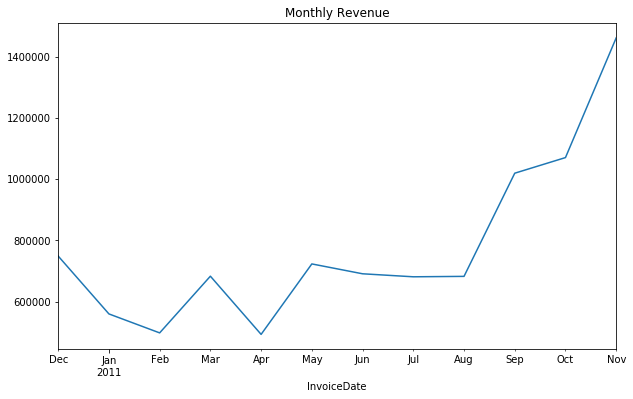

In [109]:
# Plot the monthly revenue
# the data for december 2011 is incomplete
monthly_revenue[:'2011-11-30'].plot(figsize=(10, 6), 
                                    title='Monthly Revenue'); 

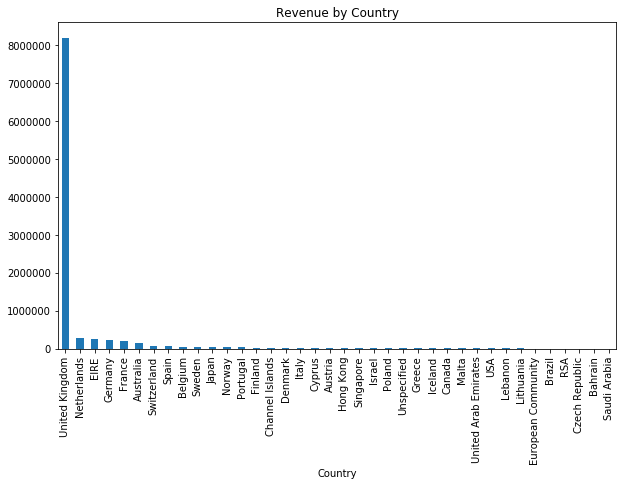

In [102]:
# Plot the revenue by country
country_revenue.sort_values(ascending=False).plot(kind='bar',
                                                  figsize=(10,6),
                                                  title='Revenue by Country');

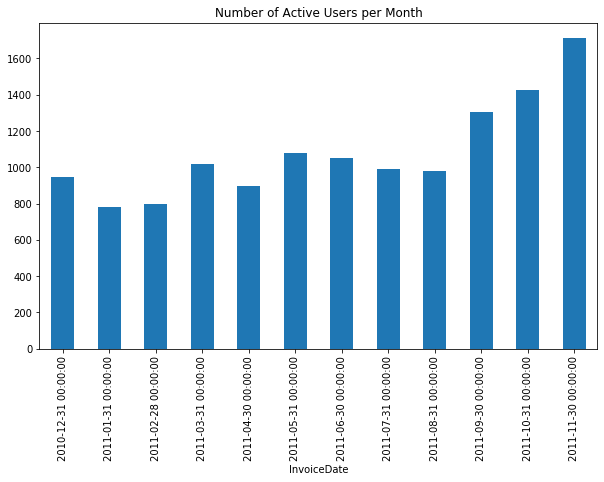

In [107]:
# Plot the number of monthly active users
active_users[:'2011-11-30'].plot(kind='bar', 
                                 figsize=(10, 6), 
                                 title='Number of Active Users per Month')

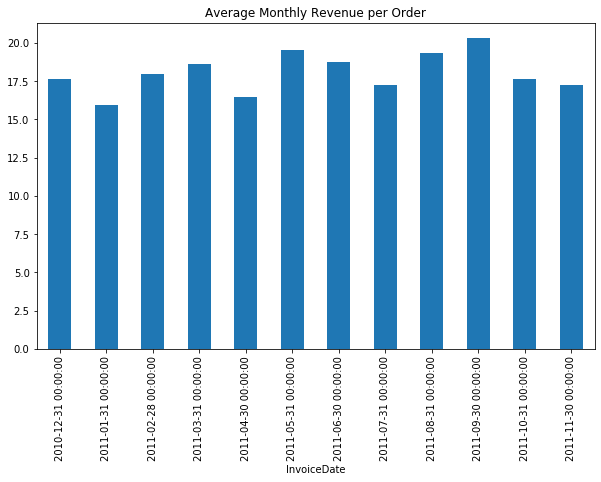

In [113]:
avg_monthly_order_revenue[:'2011-11-30'].plot(figsize=(10, 6),
                                              kind='bar',
                                              title='Average Monthly Revenue per Order');

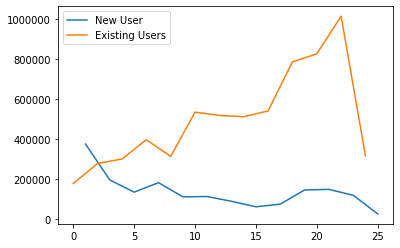

In [194]:
new_customer_revenue = user_type_revenue[user_type_revenue['UserType'] == 'New']['TotalRevenue']
existing_customer_revenue = user_type_revenue[user_type_revenue['UserType'] == 'Existing']['TotalRevenue']

# Plot the revenue by user type
plt.gca()

plt.plot(new_customer_revenue)
plt.plot(existing_customer_revenue)
plt.legend(['New User', 'Existing Users'])

# fix this later